In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load data
df = pd.read_csv('../data/Churn_Modelling.csv')

# Basic inspection
print("Dataset shape:", df.shape)
print("\n" + "="*50)
print("Column names and types:")
print(df.dtypes)
print("\n" + "="*50)
print("First 5 rows:")
print(df.head())
print("\n" + "="*50)
print("Basic statistics:")
print(df.describe())
print("\n" + "="*50)
print("Missing values:")
print(df.isnull().sum())
print("\n" + "="*50)
print("Target variable distribution:")
print(df['Exited'].value_counts())
print(f"\nChurn rate: {df['Exited'].mean()*100:.2f}%")


Dataset shape: (10000, 14)

Column names and types:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

First 5 rows:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00          

In [2]:
# Drop columns we won't use
# RowNumber, CustomerId, Surname are not predictive
df_clean = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

print("Cleaned dataset shape:", df_clean.shape)
print("\nRemaining columns:")
print(df_clean.columns.tolist())


Cleaned dataset shape: (10000, 11)

Remaining columns:
['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


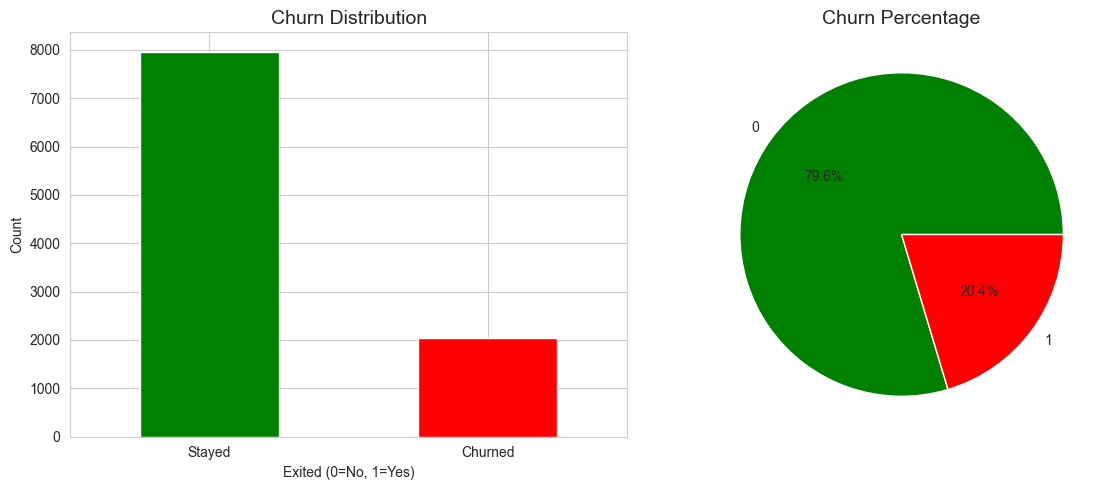

In [3]:
# Churn distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
df_clean['Exited'].value_counts().plot(kind='bar', ax=ax[0], color=['green', 'red'])
ax[0].set_title('Churn Distribution', fontsize=14)
ax[0].set_xlabel('Exited (0=No, 1=Yes)')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(['Stayed', 'Churned'], rotation=0)

# Percentage
churn_pct = df_clean['Exited'].value_counts(normalize=True) * 100
churn_pct.plot(kind='pie', ax=ax[1], autopct='%1.1f%%', colors=['green', 'red'])
ax[1].set_title('Churn Percentage', fontsize=14)
ax[1].set_ylabel('')

plt.tight_layout()
plt.savefig('../plots/01_target_distribution.png', dpi=150, bbox_inches='tight')
plt.show()


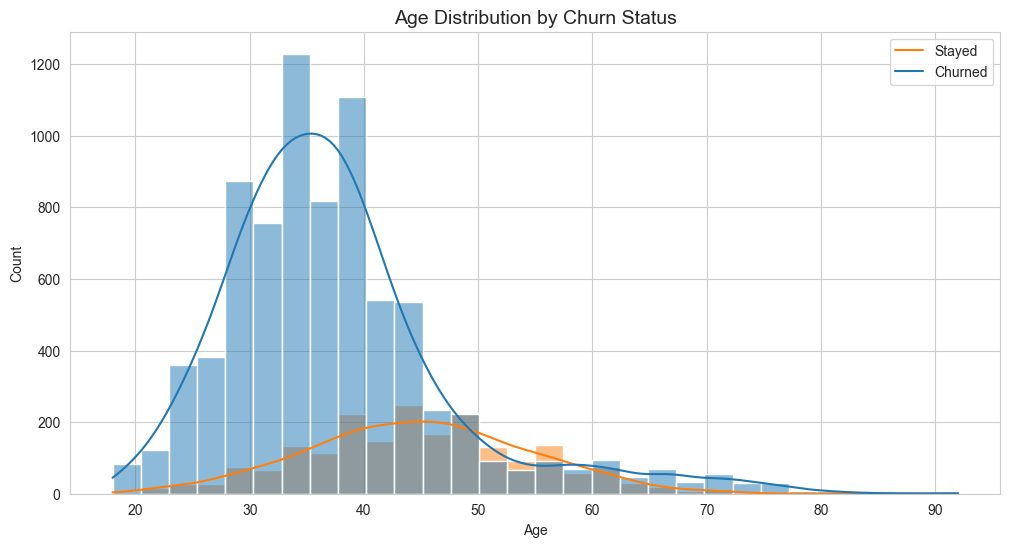

In [4]:
# Age distribution by churn
plt.figure(figsize=(12, 6))
sns.histplot(data=df_clean, x='Age', hue='Exited', bins=30, kde=True)
plt.title('Age Distribution by Churn Status', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Stayed', 'Churned'])
plt.savefig('../plots/02_churn_by_age.png', dpi=150, bbox_inches='tight')
plt.show()


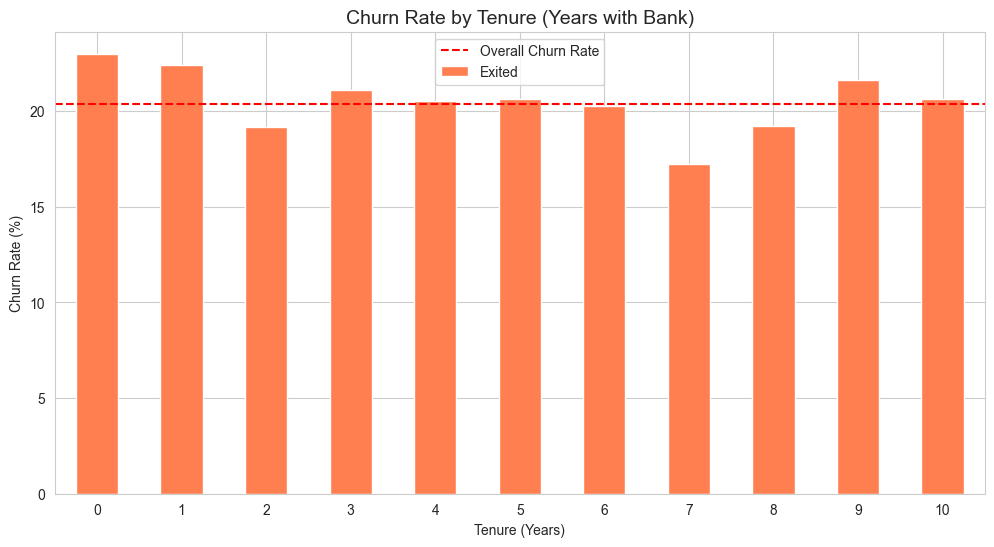

In [5]:
# Tenure vs Churn
churn_by_tenure = df_clean.groupby('Tenure')['Exited'].mean() * 100

plt.figure(figsize=(12, 6))
churn_by_tenure.plot(kind='bar', color='coral')
plt.title('Churn Rate by Tenure (Years with Bank)', fontsize=14)
plt.xlabel('Tenure (Years)')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=0)
plt.axhline(y=df_clean['Exited'].mean()*100, color='red', linestyle='--', label='Overall Churn Rate')
plt.legend()
plt.savefig('../plots/03_churn_by_tenure.png', dpi=150, bbox_inches='tight')
plt.show()


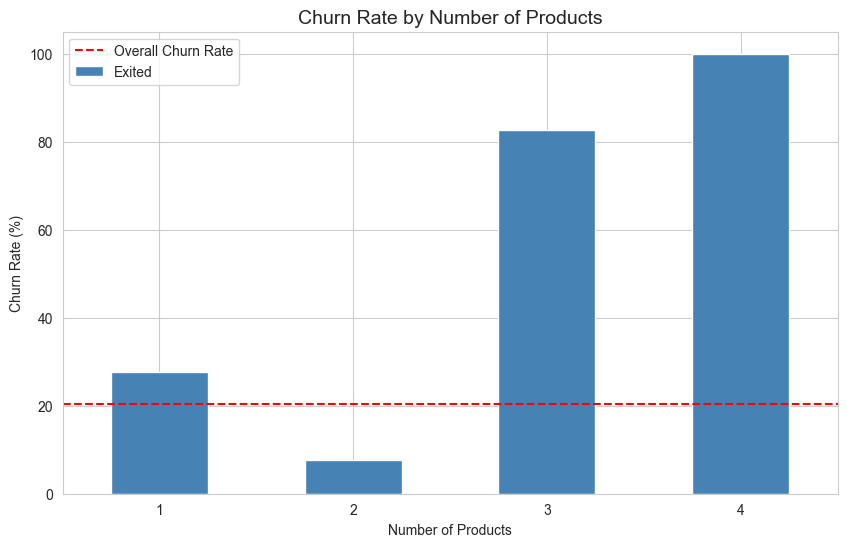

In [6]:
# Products vs Churn
churn_by_products = df_clean.groupby('NumOfProducts')['Exited'].mean() * 100

plt.figure(figsize=(10, 6))
churn_by_products.plot(kind='bar', color='steelblue')
plt.title('Churn Rate by Number of Products', fontsize=14)
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=0)
plt.axhline(y=df_clean['Exited'].mean()*100, color='red', linestyle='--', label='Overall Churn Rate')
plt.legend()
plt.savefig('../plots/04_churn_by_products.png', dpi=150, bbox_inches='tight')
plt.show()


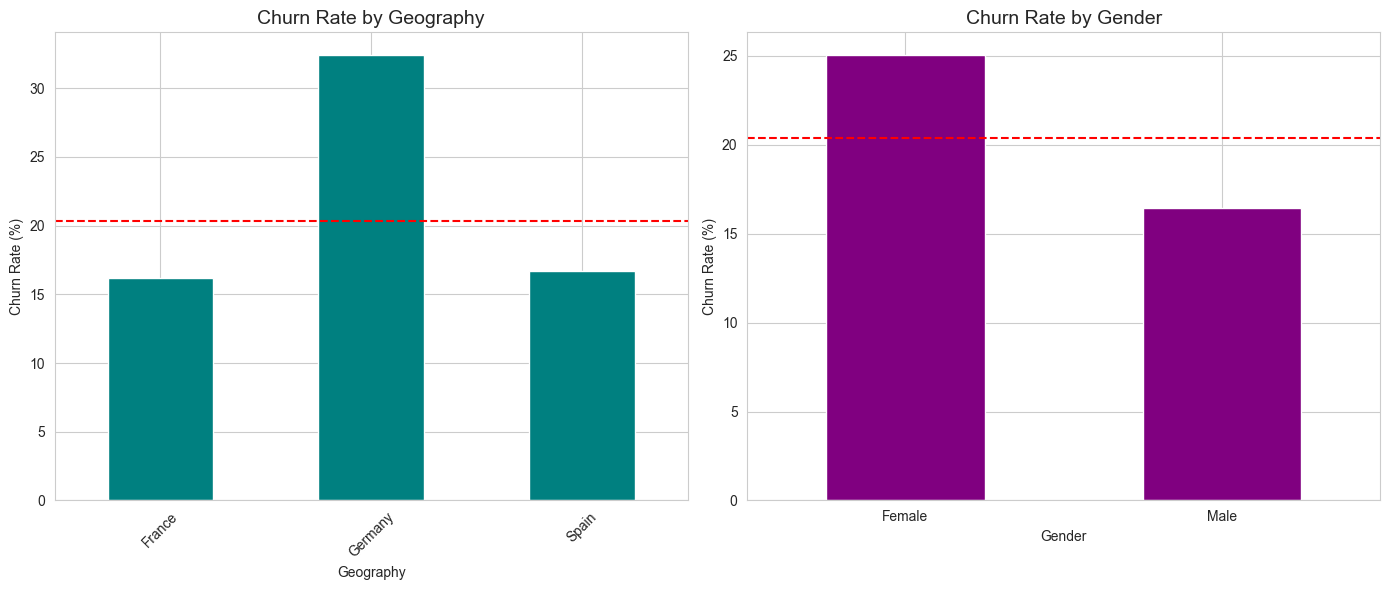

In [7]:
# Geography and Gender
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# By Geography
churn_geo = df_clean.groupby('Geography')['Exited'].mean() * 100
churn_geo.plot(kind='bar', ax=ax[0], color='teal')
ax[0].set_title('Churn Rate by Geography', fontsize=14)
ax[0].set_ylabel('Churn Rate (%)')
ax[0].set_xticklabels(churn_geo.index, rotation=45)
ax[0].axhline(y=df_clean['Exited'].mean()*100, color='red', linestyle='--')

# By Gender
churn_gender = df_clean.groupby('Gender')['Exited'].mean() * 100
churn_gender.plot(kind='bar', ax=ax[1], color='purple')
ax[1].set_title('Churn Rate by Gender', fontsize=14)
ax[1].set_ylabel('Churn Rate (%)')
ax[1].set_xticklabels(churn_gender.index, rotation=0)
ax[1].axhline(y=df_clean['Exited'].mean()*100, color='red', linestyle='--')

plt.tight_layout()
plt.savefig('../plots/05_churn_by_geo_gender.png', dpi=150, bbox_inches='tight')
plt.show()


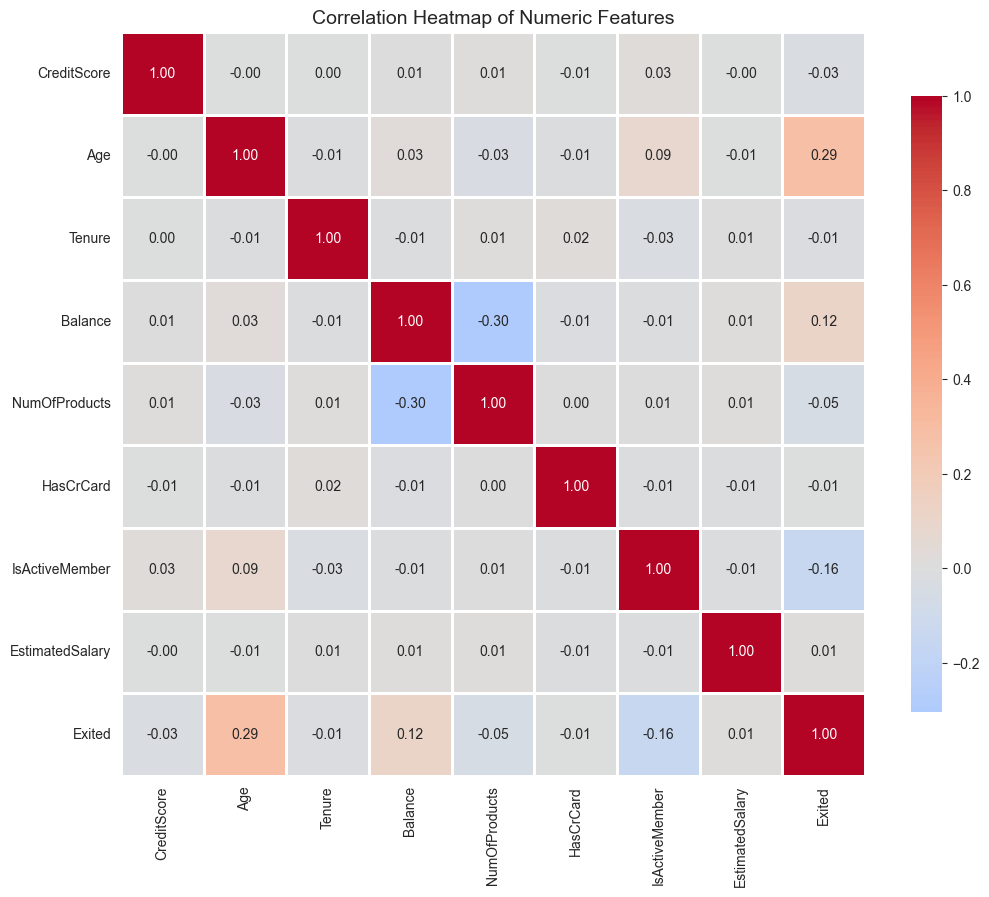

In [8]:
# Correlation heatmap for numeric features
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
corr_matrix = df_clean[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Numeric Features', fontsize=14)
plt.savefig('../plots/06_correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()


## EDA Key Findings

### 1. Target Variable: Class Imbalance
- **Churn rate: 20.4%** (2,037 churned vs 7,963 stayed)
- This is imbalanced — will need to handle during modeling (class weights or SMOTE)

### 2. Churn by Age
- **Middle-aged customers (45-60) churn significantly more**
- Younger customers (20-35) have lower churn rates
- Peak churn appears around age 45-55
- **Actionable insight**: Target retention efforts at 45+ age group

### 3. Churn by Number of Products (Key Finding)
- **1 product**: ~28% churn (above average)
- **2 products**: ~7% churn (lowest — sweet spot)
- **3 products**: ~83% churn (very high!)
- **4 products**: ~100% churn (all customers churned)
- **Insight**: Customers with 3-4 products are extremely high risk — possibly over-sold or dissatisfied. Having exactly 2 products correlates with loyalty.

### 4. Churn by Tenure
- Churn rate is **relatively flat across tenure** (~17-23%)
- Slight increase for brand new (0-1 years) and very long-term (9-10 years) customers
- Tenure alone is not a strong differentiator
- **Insight**: Tenure is less predictive than expected; combine with other features

### 5. Churn by Geography
- **Germany: 32% churn** (significantly above average)
- France: 16% churn
- Spain: 17% churn
- **Insight**: Germany is a high-risk market — investigate product/service differences there

### 6. Churn by Gender
- **Females: 25% churn** (above average)
- Males: 16% churn
- **Insight**: Female customers churn more — consider gender-specific retention strategies

---

## Summary: High-Risk Customer Profile
Based on EDA, a customer is **most likely to churn** if they are:
- **Age 45-60**
- **Located in Germany**
- **Female**
- **Have 3+ products** (major red flag)
- **Not an active member**

These insights will guide feature engineering and model interpretation.


In [10]:
df_clean = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df_clean.to_csv('../data/churn_cleaned.csv', index=False)
print("Cleaned data saved. Shape:", df_clean.shape)


Cleaned data saved. Shape: (10000, 11)
